# Lab assignment: fraud detection through ensemble methods

<img src="img/fraud.jpg" style="width:600px;">

In this assignment we will use all the skills in ensemble learning we acquire from previous exercises to build a an automated fraud detection system.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below, or in a different file as instructed. Both correctness of the solution and code quality will be taken into account for marking.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You are not expected to write any solution, but you should pay attention to them to understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary excersize that can help you gain a deeper knowledge into the topic. This exercise won't be taken into account towards marking, but you are encouraged to undertake it. Good luck!</td></tr>
</table>

During the assigment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Data loading

The data for this problem is included in the *data* folder, with separate files for training and test data. Each file includes several unidentified explanatory features, together with an "Amount" feature and the target "Class". Fraudulent operations are marked as Class == 1.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Load the training and test data into Pandas DataFrames with names *train* and *test*, respectively.
 </td></tr>
</table>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv('fraud_train.csv', delimiter=',')
test = pd.read_csv('fraud_test.csv', delimiter=',')
train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Analyze the training data. How many explanatory variables do you have? What is the distribution of classes?
 </td></tr>
</table>

In [4]:
train.describe()
#sacamos los estadísticos más relevantes del training data.
(train.shape) #Tenemos 30 variables de las cuales, 28 explicativas
train.columns
train.shape

(5246, 30)

A continuación comprobamos que no hay NAs y observamos que nuestro datsaet no está balanceado ya que com podemos observar la clase que toma el valor 0 tiene muchas más observaciones que la clase que toma el valor 1.

In [5]:
print ('Número de NAs:{:d} \n'.format(sum(np.isnan(train).any())))
train.Class.value_counts()

Número de NAs:0 



0    5000
1     246
Name: Class, dtype: int64

Aparentemente no hay variables categóricas, y todas son continuas. Vamos a dibujar unos gráficos boxplot y los histogramas de cada una para ver como se distribuyen.

In [6]:
import matplotlib.pyplot as plt
#sns.set_style("seaborn")

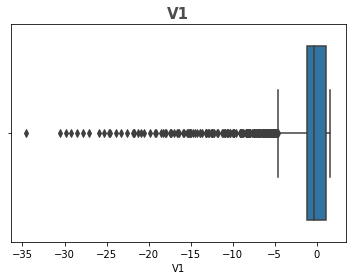

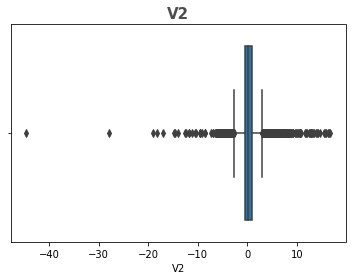

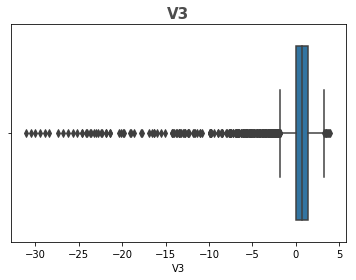

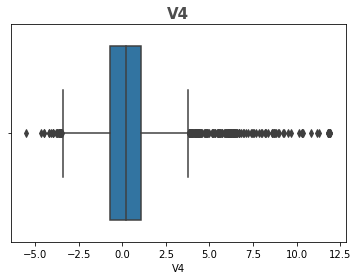

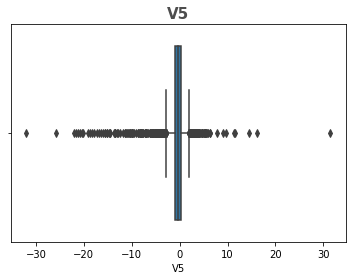

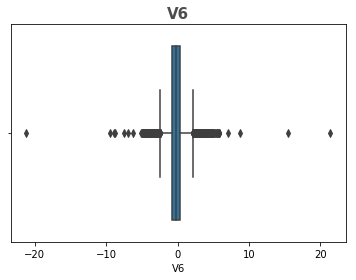

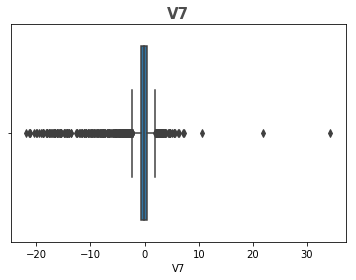

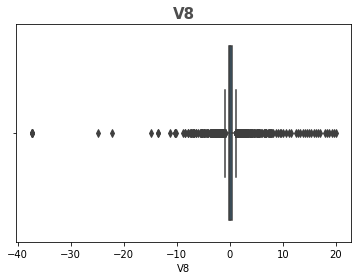

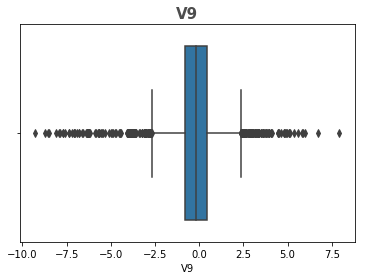

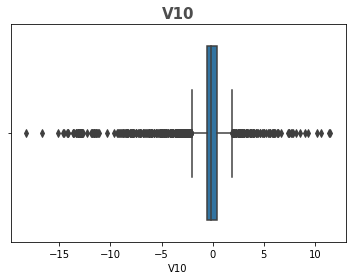

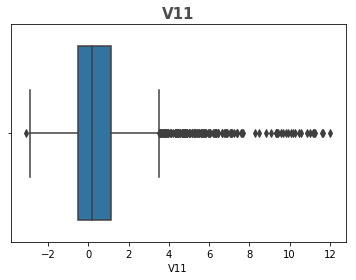

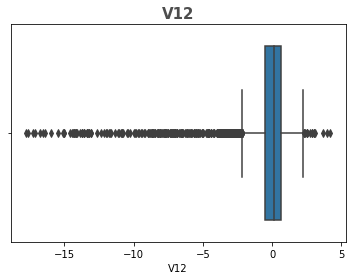

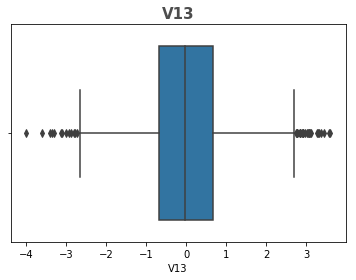

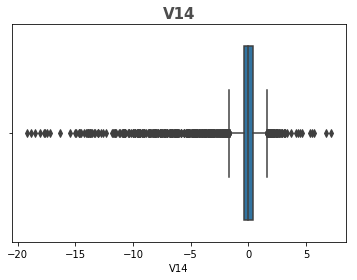

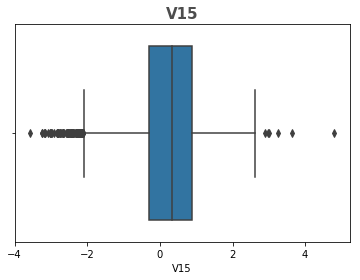

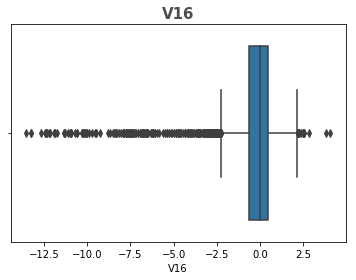

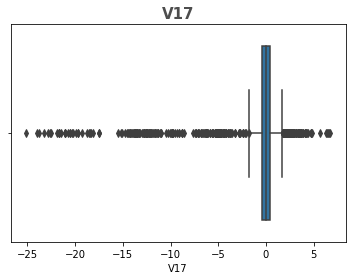

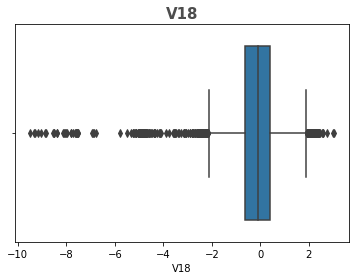

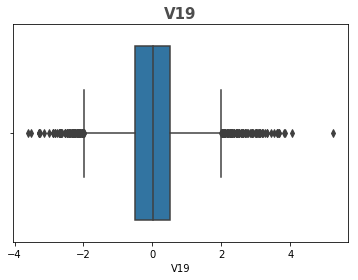

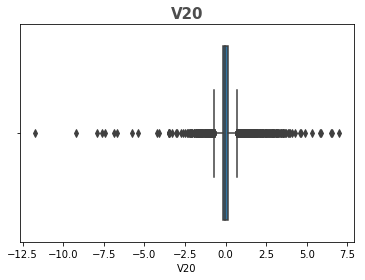

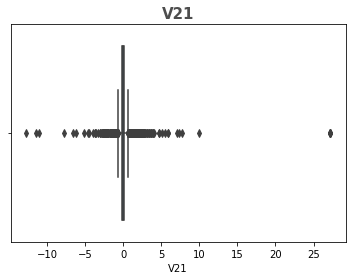

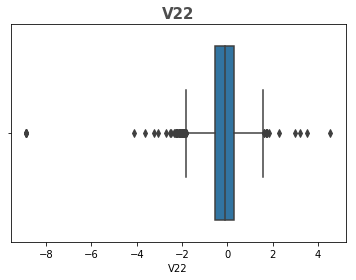

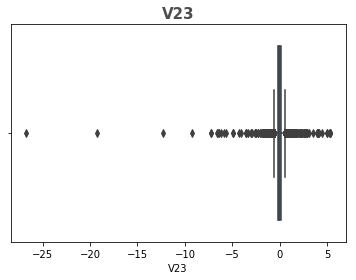

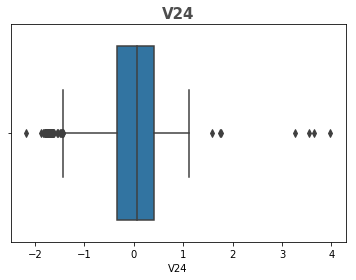

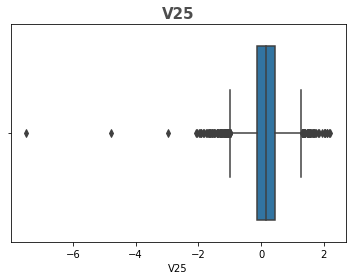

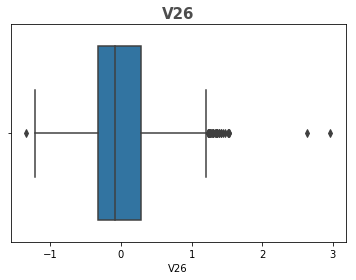

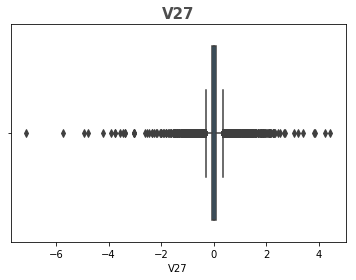

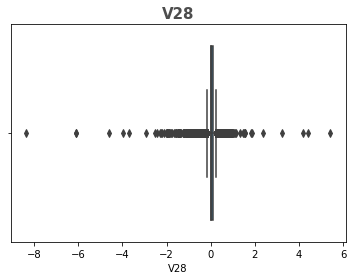

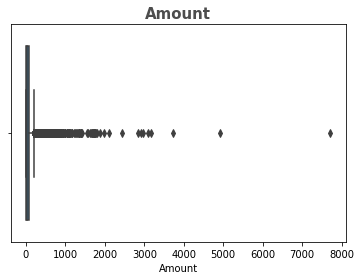

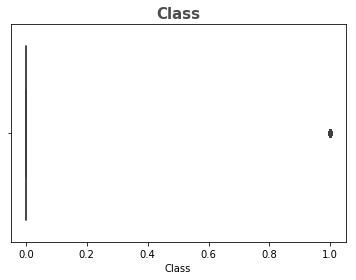

In [7]:
for i in train.columns:
    sns.boxplot(train[i])
    plt.title(i, weight="bold", size=15, color = "0.3")
    plt.show()

¿Qué distribución sigue la variable *class*?

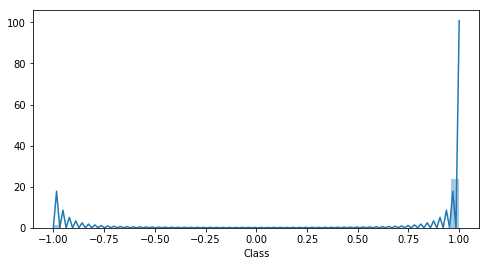

In [41]:
plt.figure(figsize=(8,4))
sns.distplot(train['Class'])
plt.show()

Estudiamos las correlaciones de la variable objetivo con el resto de predictores:

In [9]:
from scipy.stats import pearsonr

features = train.iloc[:,:-1].columns.tolist()
target = train.iloc[:,train.shape[1]-1].name

correlations = {}
for f in features:
    data_temp = train[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
correlations

data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]


,Value
V14 vs Class,-0.777546
V12 vs Class,-0.720151
V17 vs Class,-0.692453
V10 vs Class,-0.665723
V3 vs Class,-0.640011
V16 vs Class,-0.639489
V11 vs Class,0.589896
V7 vs Class,-0.567711
V4 vs Class,0.561232
V18 vs Class,-0.489802


Vemos que hay variables muy correlacionadas como V14, V12 y V17.

## Unsupervised fraud detector

Fraudulent activities are usually prosecuted, therefore fraudsters need to be creative and come up constantly with new ways of performing fraud. Furthermore, frauds are scarce (fortunately), and so we have few positive class patterns available for training. Because of these facts, it might make sense to build an unsupervised fraud detector.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Using **only the training data**, create an anomaly detection model. You should also choose an error metric adequate for the problem, and tune the model parameters in order to optimize this error.
 </td></tr>
</table>

La métrica *accuracy* no es la adecuada para medir en caso de un problema de clasificación no balanceado.  

Utilizando **roc_auc_score** como función de score y la función *predict* generaríamos predicciones de clases que da como resultado una curva ROC triangular. En nuestro caso vamos a utilizar **roc_auc** como scoring y el ROC nos va a medir la precisión del modelo para diferentes valores de threshold. Para predecir utilizaremos *predict_proba* que nos devolverá las predicciones para cada clase, lo cual es más preciso. La idea es que cambiando el threshold para asignar una observación a la clase 1, podamos controlar tanto *precision* como *recall*.

Encontrar el punto a lo largo de la curva ROC con el True Positive Rate (TPR) más alto y el False Positive Rate (FPR) más bajo nos dará el threshold óptimo.

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, precision_recall_curve, confusion_matrix

In [11]:
Xtrain = train.drop(["Class"], axis=1)
Xtrain = Xtrain.values
ytrain = train.Class.values

In [12]:
ytrain[ytrain == 1] = -1
ytrain[ytrain == 0] = 1

In [13]:
IF = IsolationForest()
IF.contamination = sum(ytrain == -1)/len(ytrain)
parameters = {"n_estimators" : (100,150,200,250), "max_features" : (1,10,15,20,25,28)}
skf = StratifiedKFold(n_splits = 3, random_state = 50)

In [14]:
IsolationForest = GridSearchCV(IF, param_grid = parameters, n_jobs=-1, cv = skf, scoring = 'roc_auc')
IsolationForest.fit(Xtrain,ytrain)
best = IsolationForest.best_score_
print(best)
print(IsolationForest.best_params_)

0.944324156805
{'max_features': 15, 'n_estimators': 100}


<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Create a visualization showing the performance of this model over the test data.
 </td></tr>
</table>

In [15]:
Xtest = test.drop(["Class"], axis=1)
Xtest=Xtest.values
ytest = test.Class.values
ytest[ytest == 1] = -1
ytest[ytest == 0] = 1

In [16]:
pred = IsolationForest.decision_function(Xtest)
IsolationForest.score(Xtest,ytest)

0.9381666666666667

In [17]:
#print(confusion_matrix(ytest,pred))
false_positive_rate, true_positive_rate, _ = roc_curve(ytest, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc:", roc_auc) #obtenemos el mismo resultado

roc_auc: 0.938166666667


Gráficamente:

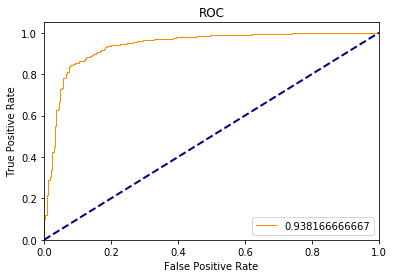

In [18]:
false_positive_rate_IF, true_positive_rate_IF, _ = roc_curve(ytest, pred)
roc_auc = auc(false_positive_rate_IF, true_positive_rate_IF)
plt.plot(false_positive_rate_IF, true_positive_rate_IF, color='darkorange',lw=1, label=roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="best")
plt.show()

**CONCLUSIÓN:** Obtenemos un 0.938 en test.

Para mostrar gráficamente lo obtenido si hubiéramos escogido el score: *roc_auc_score* y usado *predict* para predecir:

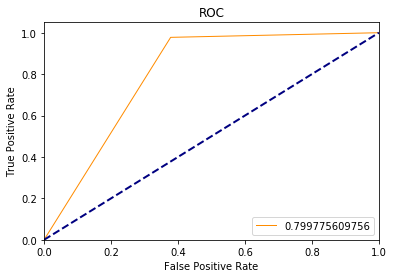

In [19]:
np.random.seed(50)
score=make_scorer(roc_auc_score)
IsolationForest2 = GridSearchCV(IF, param_grid = parameters, n_jobs=-1, cv = skf, scoring = score)
IsolationForest2.fit(Xtrain,ytrain)
pred2= IsolationForest2.predict(Xtest)
false_positive_rate, true_positive_rate, _ = roc_curve(ytest, pred2)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
#GRAFICAMOS
plt.plot(false_positive_rate, true_positive_rate, color='darkorange',lw=1, label=roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Supervised model

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Let's check now whether we can improve the results using a supervised model, that is, a model that exploits the Class information available in the training data. Build an ensemble-based classification model that performs the best as possible, **using only the data in the training set**.
 </td></tr>
</table>

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix
%matplotlib inline

In [21]:
Xtrain = train.iloc[:,:-1]
ytrain = train.iloc[:,train.shape[1]-1]
Xtest = test.iloc[:, :-1]
ytest = test.iloc[:, test.shape[1]-1]

In [22]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

A continuación vamos a crear una función que nos va a ajustar cada modelo con la misma métrica que en el modelo no supervisado.

In [23]:
def model(model, Xtrain, ytrain):
    np.random.seed(50)
    model.fit(Xtrain, ytrain)
    best = model.best_score_
    print ("AUC:",best)
    print(model.best_params_)
skf = StratifiedKFold(n_splits = 3, random_state = 50)

In [24]:
grid_RF={"max_depth": [3, 5, 10, 15, 20, 25, 30, None],  #número de niveles en el árbol
"max_features": ["sqrt", "log2", None], #nº variables a considerar en cada corte
"min_samples_split": [2, 4, 8, 16, 32, 64], #nº mínimo de muestras para realizar un corte
"min_samples_leaf": [1, 2, 4, 8, 16, 32, 64], #nº mínimo de muestras en un nodo hoja
"bootstrap": [True, False],  #método de seleccionar las muestras
"criterion": ["gini", "entropy"]}


RF= RandomForestClassifier(n_estimators =50)
randomforest = RandomizedSearchCV(RF, grid_RF, n_jobs=-1, scoring = 'roc_auc', cv = skf, n_iter=100)
rf = model(randomforest, Xtrain, ytrain)


AUC: 0.976723006612
{'min_samples_split': 2, 'min_samples_leaf': 16, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}


In [25]:
grid_GB={"loss": ["deviance", "exponential"],
"learning_rate": np.logspace(-5,0,12), #utilizado para controlar el peso de nuevos árboles añadidos al model y evitar overfitting
"max_depth": [3, 5, 10, 15, 20, 25, 30, None],
"min_samples_split": [2, 4, 8, 16, 32, 64],
"min_samples_leaf": [1, 2, 4, 8, 16, 32, 64],
"subsample" : [0.1, 0.2, 0.5, 0.9, 1],
"max_features": ["sqrt", "log2", None]}


GB= GradientBoostingClassifier(n_estimators =50)
gradientboost = RandomizedSearchCV(GB, grid_GB, n_jobs=-1, scoring = "roc_auc", cv = skf, n_iter=100)
model(gradientboost, Xtrain, ytrain)

AUC: 0.977326612541
{'subsample': 1, 'min_samples_split': 4, 'min_samples_leaf': 16, 'max_features': 'log2', 'max_depth': 3, 'loss': 'deviance', 'learning_rate': 0.35111917342151272}


In [26]:
grid_AB={"learning_rate": np.logspace(-5,0,50)}

AB= AdaBoostClassifier(n_estimators =50)
adaboost = GridSearchCV(AB, grid_AB, n_jobs=-1, scoring = 'roc_auc', cv = skf)
model(adaboost, Xtrain, ytrain)

AUC: 0.980197358409
{'learning_rate': 0.095409547634999439}


In [27]:
grid_EGB={'gamma' : [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
'max_depth': [6, 9, 12],
'subsample': [0.5, 0.9, 1.0],
'colsample_bytree': [0.5, 0.9, 1.0],
'reg_lambda' : [0, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

EGB = XGBClassifier(n_estimators=50 )
extreme = RandomizedSearchCV(EGB, grid_EGB, n_jobs=-1,n_iter=50, scoring = 'roc_auc', cv = skf)
model(extreme, Xtrain, ytrain)

AUC: 0.976553537189
{'subsample': 0.9, 'reg_lambda': 0, 'max_depth': 12, 'gamma': 0.1, 'colsample_bytree': 0.5}


<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Now create a visualization showing the performance of this supervised model on the test set, together with the unsupervised model. Has the performance improved after making use of the Class data?
 </td></tr>
</table>

In [28]:
from itertools import cycle
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange','pink', 'green'])

def roc_curve_acc(model,name,  ytest):
    pred = model.predict_proba(Xtest)[:,1]
    false_positive_rate, true_positive_rate, _ = roc_curve(ytest, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("ROC modelo", name, roc_auc)    
    plt.plot(false_positive_rate, true_positive_rate, color=next(colors),label='%s= %0.3f'%(name, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC curve for fraud classifier')
    plt.legend(loc='best')
    return

ROC modelo randomforest: 0.981821138211
ROC modelo gradientboost: 0.974604878049
ROC modelo adaboost: 0.976198373984
ROC modelo extreme: 0.98302601626


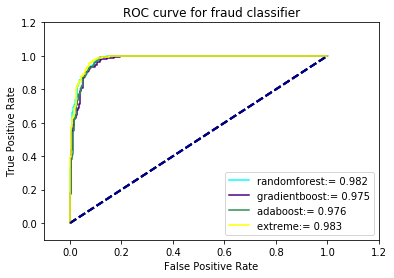

In [29]:
models = [randomforest, gradientboost,adaboost, extreme]
names = ["randomforest:", "gradientboost:", "adaboost:", "extreme:"]
for model, name in zip(models, names):
    roc_curve_acc(model,name, ytest)

De igual manera que en el apartado no supervisado, si hubiésemos escogido el score: roc_auc_score y usado predict para predecir:

In [30]:
def roc_curve_acc2(model,name, ytest):
    pred = model.predict(Xtest)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("ROC modelo", name, roc_auc)    
    plt.plot(false_positive_rate, true_positive_rate, color=next(colors),label='%s = %0.3f'%(name, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='best')   
    return 


ROC modelo randomforest: 0.892276422764
ROC modelo gradientboost: 0.899106504065
ROC modelo adaboost: 0.900406504065
ROC modelo extreme: 0.906404065041


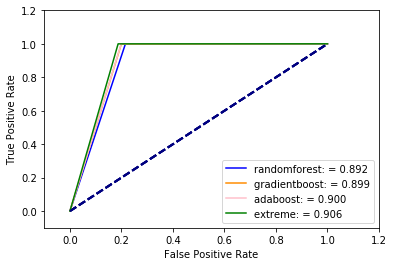

In [31]:
models = [randomforest, gradientboost,adaboost, extreme]
names = ["randomforest:", "gradientboost:", "adaboost:", "extreme:"]
for model, name in zip(models, names):
    roc_curve_acc2(model,name, ytest)
 

Comparamos a continuación el método no supervisado y el mejor supervisado y observamos que los resultados han mejorado utilizando métodos supervisados.

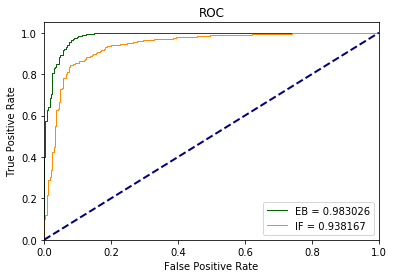

In [32]:
pred = extreme.predict_proba(Xtest)[:,1]
fprEB, tprEB, thresholds = roc_curve(ytest, pred)
roc_aucEB = auc(fprEB, tprEB)
plt.plot(fprEB, tprEB, color='darkgreen',lw=1, label='EB = %f'%(roc_aucEB))
plt.plot(false_positive_rate_IF, true_positive_rate_IF, color='darkorange',lw=1, label='IF = %f'%(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="best")
plt.show()